# The Ultimate Inc. Data Science Challenge

## Part 1. Exploratory Data Analysis

### Objectives

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. <ul><li>Aggregate the login counts based on 15 minute time intervals.</li><li>Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.</li><li>Report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.</li></ul>

In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load json file as string
json_str = json.load((open( 'logins.json')))
# load json file as Pandas dataframe
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
# adding a column that shows the number of logins 
logins['freq'] = 1
# resampling logins to 15 min intervals
logins_15 = logins.set_index('login_time').resample('15min').sum().reset_index()

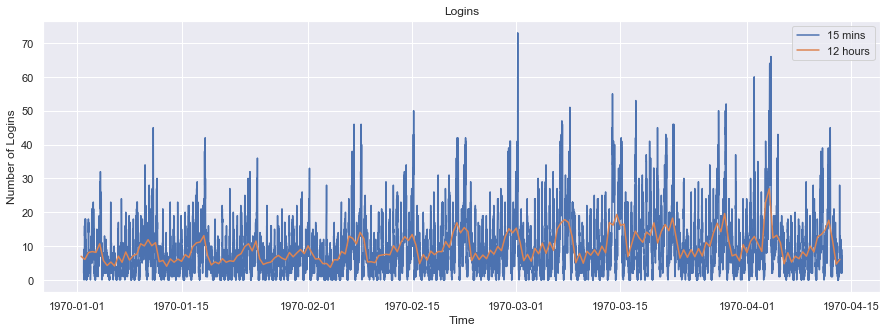

In [5]:
# smoothing the data by resampling every 12 hours
weekly = logins_15.set_index('login_time').resample('12H').mean().reset_index()

# plotting the data
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.title('Logins')
_ = plt.plot(logins_15.login_time, logins_15.freq)
_ = plt.plot(weekly.login_time, weekly.freq)
_ = plt.legend(['15 mins','12 hours'])

It does look like there is an underlying pattern in the data, but it is hard to see at this scale.

In [6]:
from datetime import datetime as dt

# grouping the data into months
jan =  logins_15[logins_15.login_time.dt.month == 1]
feb =  logins_15[logins_15.login_time.dt.month == 2]
feb.index = np.arange(0, len(feb))
mar = logins_15[logins_15.login_time.dt.month == 3]
mar.index = np.arange(0, len(mar))
apr = logins_15[logins_15.login_time.dt.month == 4]
apr.index = np.arange(0, len(apr))

months = [jan, feb, mar, apr]

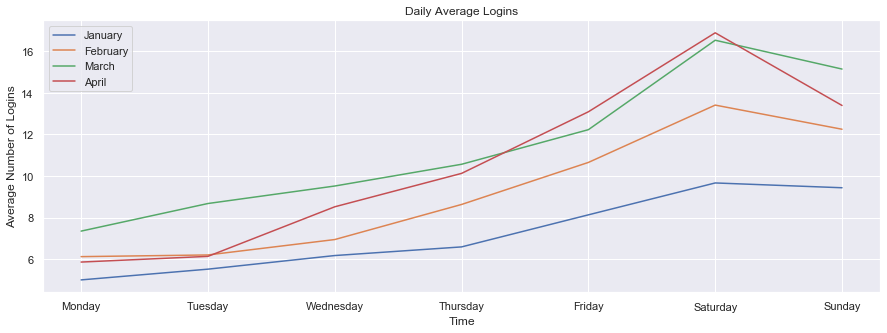

In [7]:
# calculating the mean daily logins  for each month
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Time')
plt.ylabel('Average Number of Logins')
plt.title('Daily Average Logins')

month_daily = []
for i in range(0, len(months)):
    month_daily.append(months[i].groupby(months[i].login_time.dt.dayofweek).mean().reset_index())
    plt.plot(month_daily[i].login_time, month_daily[i].freq)
    plt.legend(['January','February','March','April'])
    plt.xticks([0,1,2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

The above figure illustrates the daily average logins for each month. It is clear that number of logins increase on the weekends and peaks on Saturdays. Lowest averages are in January, and increasing in March and April.

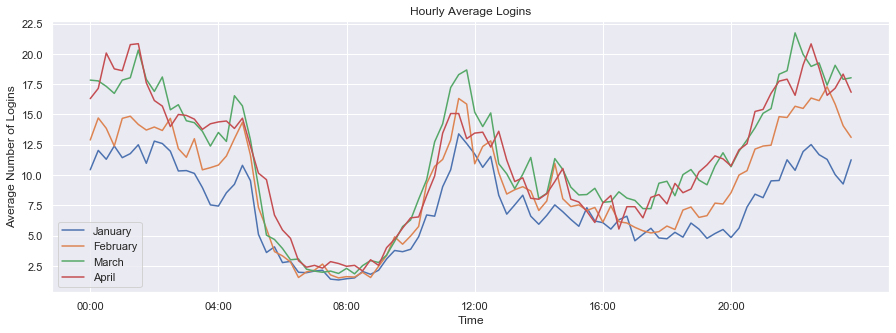

In [8]:
# calculating the mean hourly logins for each day in a month
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Time')
plt.ylabel('Average Number of Logins')
plt.title('Hourly Average Logins')
hourly_ticks = 4 * 60 * 60 * np.arange(6)

month_hourly = []
for i in range(0, len(months)):
    month_hourly.append(months[i].groupby(months[i].login_time.dt.time).mean().reset_index())
    plt.plot(month_hourly[i].login_time, month_hourly[i].freq)
    plt.legend(['January','February','March','April'])
    plt.xticks(hourly_ticks)

The above figure illustrates the hourly average logins for each day in a month. After midnight and around noon are the busiest times.

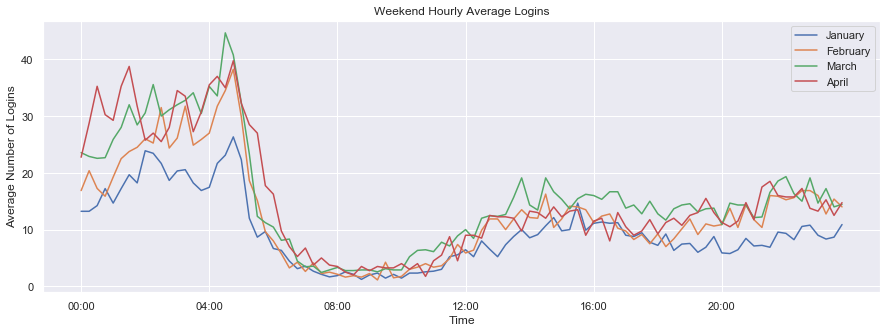

In [9]:
# calculating the mean hourly logins for only weekends in a month
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Time')
plt.ylabel('Average Number of Logins')
plt.title('Weekend Hourly Average Logins')
hourly_ticks = 4 * 60 * 60 * np.arange(6)

month_weekend = []
month_weekend_hourly = []
for i in range(0, len(months)):
    month_weekend.append( months[i][(months[i].login_time.dt.dayofweek==5)|(months[i].login_time.dt.dayofweek==6)])
    month_weekend_hourly.append(month_weekend[i].groupby(month_weekend[i].login_time.dt.time).mean().reset_index())
    plt.plot(month_weekend_hourly[i].login_time, month_weekend_hourly[i].freq)
    plt.legend(['January','February','March','April'])
    plt.xticks(hourly_ticks)

The above figure illustrates the hourly average logins for only weekends in a month. After midnight until 4:00am is the busiest times for the weekends.

In [10]:
#logins_weekday = logins_df_15m[logins_df_15m['weekday'].isin(['Thu', 'Fri', 'Mon', 'Tue', 'Wed'])]
#logins_weekend = logins_df_15m[logins_df_15m['weekday'].isin(['Sat', 'Sun'])]

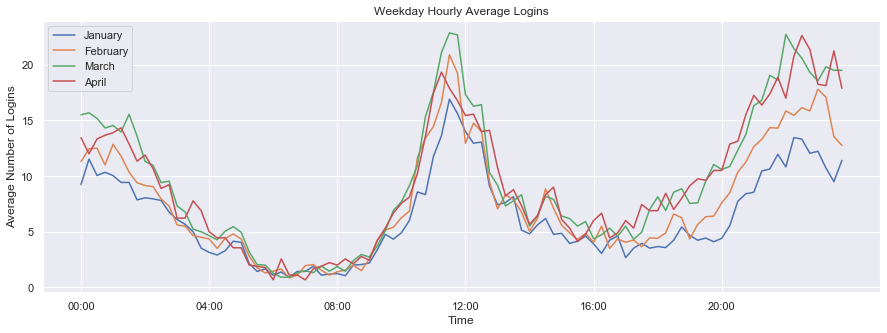

In [11]:
# calculating the mean hourly logins for only weekdays in a month
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Time')
plt.ylabel('Average Number of Logins')
plt.title('Weekday Hourly Average Logins')
hourly_ticks = 4 * 60 * 60 * np.arange(6)

month_weekday = []
month_weekday_hourly = []
for i in range(0, len(months)):
    month_weekday.append(months[i][(months[i].login_time.dt.dayofweek==0)|(months[i].login_time.dt.dayofweek==1)| 
                 (months[i].login_time.dt.dayofweek==2)|(months[i].login_time.dt.dayofweek==3)|
                 (months[i].login_time.dt.dayofweek==4)])
    month_weekday_hourly.append(month_weekday[i].groupby(month_weekday[i].login_time.dt.time).mean().reset_index())
    plt.plot(month_weekday_hourly[i].login_time, month_weekday_hourly[i].freq)
    plt.legend(['January','February','March','April'])
    plt.xticks(hourly_ticks)

The above figure illustrates the hourly average logins for only weekdays in a month. Early midnight and around noon are the busiest times for the weekdays.

## Part 2. Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.<br>
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

### Objectives

<ol><li> What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?</li>
<li> Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:</li>
<ol><li> How you will implement the experiment</li>
<li> What statistical test(s) you will conduct to verify the significance of the
observation</li>
<li> How you would interpret the results and provide recommendations to the city
operations team along with any caveats.</li></ol></ol>

The key measure of success would be an increase in the number of rides provided by driver partners in their neighboring city. This increase directly measures the activity of drivers outside their home city.<br>
The Ultimate managers of city operations is proposing an experiment to encourage driver partners to be available in both cities by reimbursement of all toll costs. We are trying to understand whether reimbursing all toll costs is effective or not. So in this case the null and alternative hyphothesis are; <ul><li> H0 : Reimbursement does not increase the average number of rides provided by drivers partners in the neighboring city.</li><li>H1 : Reimbursement does increase the average number of rides provided by driver partners in the neighboring city.</li></ul>

As a first step, we randomly split the driver partners into two groups. We say that the drivers receiving the reimbursement belong to the treatment group, and the others to the control group. The advantage of testing a small subgroup is that it is less expensive than testing on the entire driver population.<br> By selecting a small test group, we can examine if  there was a significant increase in the number of rides in the neighboring city in this small group before and after reimbursement or we can also compare the difference in the treatmnet and control group.<br>
the statistical test I would conduct to verify the significance of the observation would be permutation test. The test statistic is the mean difference in the number of rides to the neighboring city between the treatment and control group. To obtain our initial test statistic, we simply subtract the mean number of rides to the neighboring city of the drivers that received reimbursement from the mean number of rides to the neighboring city of the drivers that did not receive reimbursement. As the most important step of the permutation test, we permute (shuffle) the number of rides of each driver from the two groups. We repeat this process, permuting our data over and over again, and recalculate the average number of rides at each iteration until we create the approximate test statistic distribution. We can then use this distribution to obtain probabilities associated with different mean-difference values, where we assume that reimbursement does not increase the number of rides to the neighboring city. Then we calculate the p-value which represents the probability of obtaining the observed values, assuming the null hypothesis is true. If the p-value is less than or equal to the desired significance level threshold (i.e. 5%), we reject the null hypothesis; the outcome is said to be statistically significant. We can conclude that <ul><li>A low p-value signals that, we rejectthe null hypothesis and accept our alternative: Reimbursement appear to be increasing the average number of rides provided by driver partners in the neighboring city. </li><li> A high p-value signals the opposite, such an outcome is likely under the null hypothesis.</li></ul><br>
A caveat is that this experiment was done on a small treatment group, and not the full driver population.

## Part 3. Predictive modeling

### 3.1. Dataset

The data is in the attached file "ultimate_data_challenge.json". Detailed description of the dataset:<br>

<ul> 
<li><b>city:</b> city this user signed up in</li>
<li> <b>phone: </b> primary device for this user</li>
<li> <b>signup_date:</b> date of account registration; in the form ‘YYYYMMDD’</li>
<li> <b>last_trip_date:</b> the last time this user completed a trip; in the form ‘YYYYMMDD’</li>
<li> <b>avg_dist:</b> the average distance in miles per trip taken in the first 30 days after signup</li>
<li> <b>avg_rating_by_driver:</b> the rider’s average rating over all of their trips</li>
<li><b> avg_rating_of_driver:</b> the rider’s average rating of their drivers over all of their trips</li>
<li> <b>surge_pct:</b> the percent of trips taken with surge multiplier > 1</li>
<li> <b>avg_surge:</b> the average surge multiplier over all of this user’s trips</li>
<li> <b>trips_in_first_30_days:</b> the number of trips this user took in the first 30 days after
signing up</li>
<li><b>ultimate_black_user</b> TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise</li>
<li><b>weekday_pct</b> the percent of the user’s trips occurring during a weekday</li></ul> 

### 3.2. Objectives

<ol><li>Use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. We consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.</li><li> Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?</li>
<li> Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.</li>
<li> Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).</li></ol>

### 3.3. Data Wrangling

In [12]:
# importing necessary packages 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
# load json file as string
json_str = json.load((open( 'ultimate_data_challenge.json')))
# load json file as Pandas dataframe
users = pd.DataFrame(json_str)
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
# changing 'last trip date' and 'signup_date' column types to datetime 
users['last_trip_date']= pd.to_datetime(users['last_trip_date'])
users['signup_date']=pd.to_datetime(users['signup_date'])

# assuming that the data was pulled on the max date of last trip in the dataset
last_day = users.last_trip_date.max()

# creating 'retained' column if the time past since from last day to the last trip day <= 30
time_past = last_day - users['last_trip_date']
users['retained'] = np.where(time_past.dt.days <= 30, 1, 0)

# creating a column that shows duration of the being a user time
users['duration'] = users['last_trip_date']  - users['signup_date']
users['duration'] = users['duration'].astype('int')

In [16]:
ret = users['retained'].value_counts()
print('The number of retained users is: {} \nThe number of non retained users is: {}'.format(ret[1],ret[0] ))

The number of retained users is: 18804 
The number of non retained users is: 31196


In [17]:
users['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [18]:
#null_data = users[users.isnull().any(axis=1)]

In [19]:
# looking at the mean values and stds of numeric columns
users['ultimate_black_user'] = users['ultimate_black_user'].astype('category')
users.groupby('retained').agg([np.mean,np.std])

trips_in_first_30_days           avg_rating_of_driver            \
                           mean       std                 mean       std   
retained                                                                   
0                      1.658482  2.654222             4.607557  0.664418   
1                      3.306318  4.986743             4.592930  0.542386   

         avg_surge           surge_pct            weekday_pct             \
              mean       std      mean        std        mean        std   
retained                                                                   
0         1.075339  0.251361  8.666739  22.179139   60.647032  40.982688   
1         1.073809  0.163170  9.152797  15.588704   61.389034  29.487584   

          avg_dist           avg_rating_by_driver            \
              mean       std                 mean       std   
retained                                                      
0         6.207939  6.238675             4.787464  0.504648   
1         5.114788  4.615175             4.762772  0.328489   

                   duration                
                       mean           std  
retained                                   
0          4772503244005642  4.181244e+15  
1         13399820293554562  1.085144e+15

In [20]:
# stds of 'avg_rating_of_driver' and 'avg_rating_by_driver' are not very big,
# so filling the missing values with mean
users['avg_rating_by_driver'].fillna(users['avg_rating_by_driver'].mean(), inplace=True)
users['avg_rating_of_driver'].fillna(users['avg_rating_of_driver'].mean(), inplace=True)

# dropping the small number of rows with null phone.
users=users.loc[pd.notnull(users.phone)]

### 3.4. Exploratory Data Analysis

In [21]:
users.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained', 'duration'],
      dtype='object')

In [22]:
# grouping the categorical and numerical columns for visualization purposes
cats = ['city', 'phone', 'ultimate_black_user']
numerics = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
           'weekday_pct', 'avg_dist','avg_rating_by_driver', 'duration']

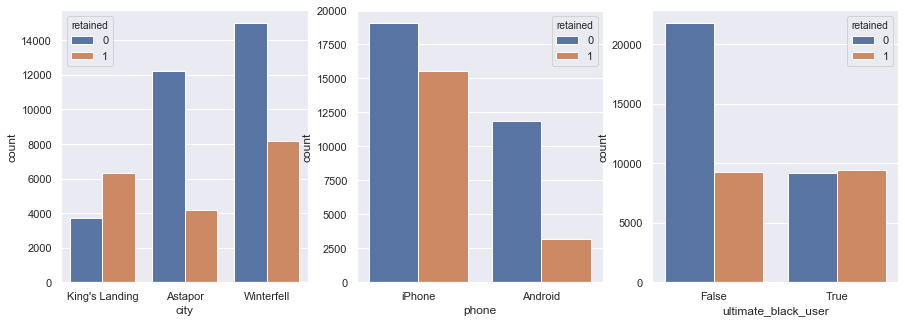

In [23]:
# visualizing categorical data based on the retained column
fig,ax =plt.subplots(1, len(cats), figsize=[15,5])
for i in range(0, len(cats)):
    sns.countplot(x= cats[i], data=users, hue='retained', ax=ax[i]);

In King's Landing city, the number of retained users are relatively higher than the non retained users. But for Astspor City and Winterfell the number of retained users are higher than the non retained users.<br>

Second graph shows that for both iphone and android users the number of non retained customers are higher. But this situation is more dominant for Android users. <br>

The number of non retained customers are so much higher than the number of retained customers for the non ultimate black users.

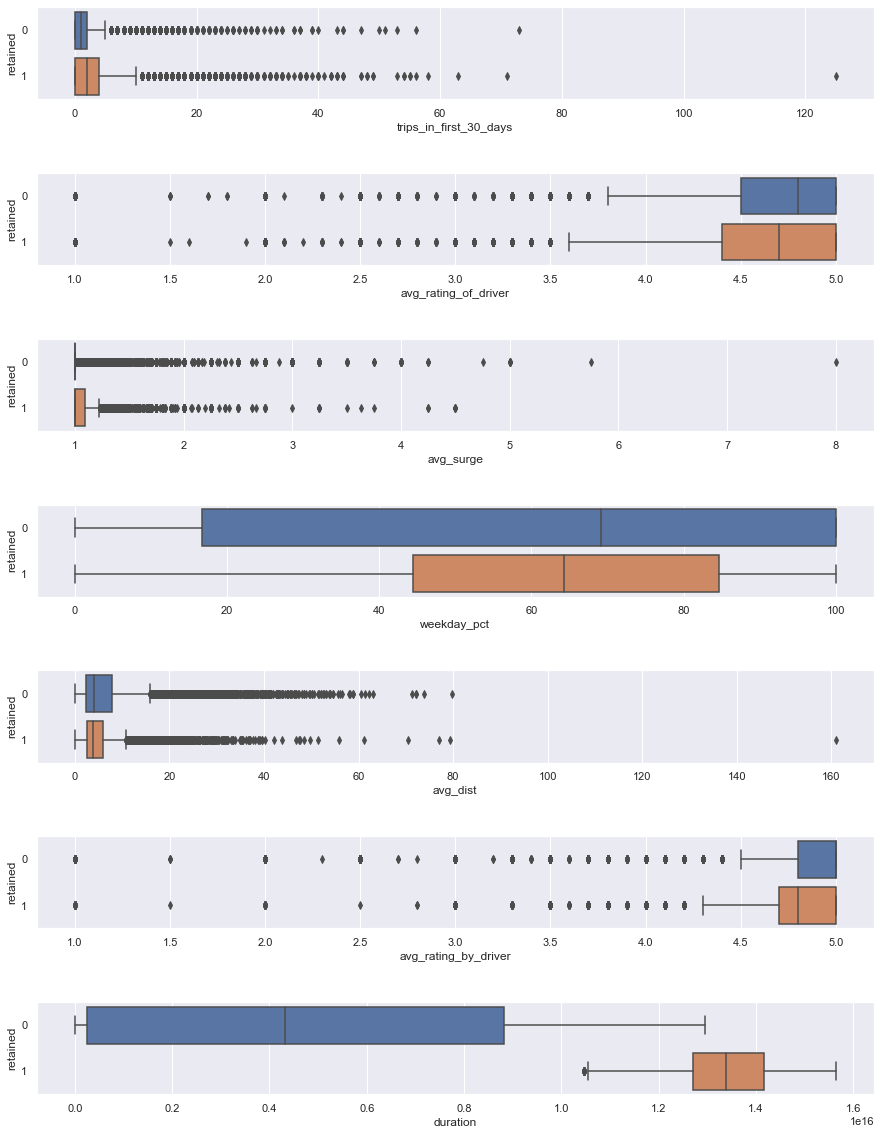

In [24]:
# visualizing numerical data based on the retained column
fig,ax =plt.subplots(len(numerics),1 , figsize=[15,20])
for i in range(0, len(numerics)):
    sns.boxplot(x = numerics[i], y ='retained', data=users, ax=ax[i], orient='h')
    plt.subplots_adjust(hspace = 0.8)

In the 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'avg_rating_of_driver', 'avg_rating_by_driver' columns the number of retained users are slighly higher the the number of non reatined users.<br> 

In the 'avg_dist' column, the number of non retained users are slighly higher than the other.<br> 

There is a strange pattern in the weekday fraction, with more retained users with very low and very high weekday usage, and more retined users in the center with a mixed usage pattern.<br> 

From the last graph, we see that if a user is a member for a longer period of time, the user is more likely to be a retained customer.

### 3.5. Predictive Modeling

In [25]:
# preparing columns for predictive modeling

# dropping the redundant columns
users_encoded = users.drop(['signup_date', 'last_trip_date'], axis = 1, inplace = True)

# converting the categorical columns to 1 and 0's.
users_encoded = pd.get_dummies(users, prefix=[''], columns=['city'])
users_encoded['phone'] = np.where(users['phone'] == 'iphone', 1, 0)
users_encoded['ultimate_black_user'] = np.where(users['ultimate_black_user'] == True, 1, 0)

# rescaling number of trips first 30 day, avg distance, duration columns to 0-1 scale for LR
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ['trips_in_first_30_days','avg_dist', 'weekday_pct', 'surge_pct', 'duration',
                 'avg_rating_of_driver', 'avg_rating_by_driver', 'avg_surge']
def scaleColumns(cols_to_scale):
    for col in cols_to_scale:
        users_encoded[col] = scaler.fit_transform(users[[col]])
    return users_encoded.head()


In [26]:
# calling the function on the columns that need to be scaled
scaleColumns(cols_to_scale)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,duration,_Astapor,_King's Landing,_Winterfell
0,0.032,0.925,0.014286,0,0.154,1,0.462,0.022801,1.000,1,0.790055,0,1,0
1,0.000,1.000,0.000000,0,0.000,0,0.500,0.051317,1.000,0,0.530387,1,0,0
2,0.024,0.825,0.000000,0,0.000,0,1.000,0.004784,1.000,0,0.005525,1,0,0
3,0.072,0.900,0.020000,0,0.200,1,0.800,0.014662,0.975,1,0.939227,0,1,0
4,0.112,0.850,0.027143,0,0.118,0,0.824,0.019446,0.975,0,0.259669,0,0,1


### Up-sample Minority Class

In [27]:
# getting the ratio of reatained users 
frac_retained = users_encoded['retained'].sum() / len(users_encoded['retained'])
print('The overall fraction of retained users is: {:.3f}'.format(frac_retained))

The overall fraction of retained users is: 0.376


In [28]:
# importing module for resampling
from sklearn.utils import resample

# Separate majority and minority classes
data_majority = users_encoded[users_encoded.retained == 0]
data_minority = users_encoded[users_encoded.retained == 1]
 
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,                        # sample with replacement
                                 n_samples=len(data_majority),    # to match majority class
                                 random_state=123)                    # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
data.retained.value_counts()

1    30933
0    30933
Name: retained, dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61866 entries, 1 to 32198
Data columns (total 14 columns):
trips_in_first_30_days    61866 non-null float64
avg_rating_of_driver      61866 non-null float64
avg_surge                 61866 non-null float64
phone                     61866 non-null int64
surge_pct                 61866 non-null float64
ultimate_black_user       61866 non-null int64
weekday_pct               61866 non-null float64
avg_dist                  61866 non-null float64
avg_rating_by_driver      61866 non-null float64
retained                  61866 non-null int64
duration                  61866 non-null float64
_Astapor                  61866 non-null uint8
_King's Landing           61866 non-null uint8
_Winterfell               61866 non-null uint8
dtypes: float64(8), int64(3), uint8(3)
memory usage: 5.8 MB


### Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split

# creating the training and test datasets
features = data.drop('retained', axis=1)
target = data['retained']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy score on train set:', logreg.score(X_train, y_train))
print('Accuracy score on test set:', logreg.score(X_test, y_test))

Accuracy score on train set: 0.9591973398605275
Accuracy score on test set: 0.9587823275862069


In [32]:
# printing the classification report
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      9199
           1       0.95      0.97      0.96      9361

    accuracy                           0.96     18560
   macro avg       0.96      0.96      0.96     18560
weighted avg       0.96      0.96      0.96     18560



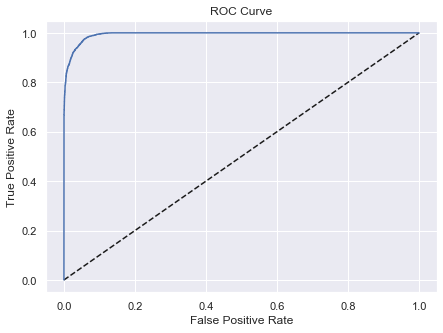

In [33]:
# Import necessary modules 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(7,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [34]:
print(logreg.coef_)

[[ 3.86413466 -0.61232021  0.27636302  0.         -0.26564249  0.79155296
  -0.5036422  -0.775718   -1.39088704 28.81939804 -5.30109982 -3.7809229
  -4.93105025]]


In [35]:
print(np.array([features.columns]))

[['trips_in_first_30_days' 'avg_rating_of_driver' 'avg_surge' 'phone'
  'surge_pct' 'ultimate_black_user' 'weekday_pct' 'avg_dist'
  'avg_rating_by_driver' 'duration' '_Astapor' "_King's Landing"
  '_Winterfell']]


In [36]:
# creating a dataframe that shows the coefficients of each feature
feature_importance=pd.DataFrame(np.hstack((np.array([features.columns]).T, logreg.coef_.T)),
                                columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)                                                     

,feature,importance
9,duration,28.819398
0,trips_in_first_30_days,3.864135
5,ultimate_black_user,0.791553
2,avg_surge,0.276363
3,phone,0.000000
4,surge_pct,-0.265642
6,weekday_pct,-0.503642
1,avg_rating_of_driver,-0.612320
7,avg_dist,-0.775718
8,avg_rating_by_driver,-1.390887


'duration' , 'Astapor', 'Winterfall'  are most important features in determining whether a user is retained or non retained.

### XGBoost

In [37]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)

print('Accuracy score on train set:', xg.score(X_train, y_train))
print('Accuracy score on test set:', xg.score(X_test, y_test))

Accuracy score on train set: 0.9616450376391262
Accuracy score on test set: 0.9584051724137931


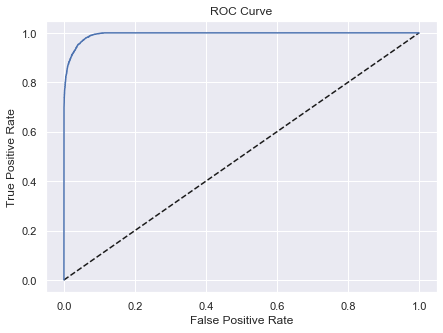

In [38]:
# Import necessary modules 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = xg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(7,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [39]:
data.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'phone',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained', 'duration', '_Astapor',
       '_King's Landing', '_Winterfell'],
      dtype='object')

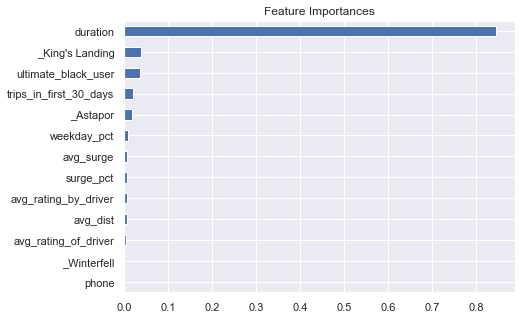

In [40]:
# Create series of the features importances and sort the values
importances = pd.Series(xg.feature_importances_, index=['trips_in_first_30_days', 'avg_rating_of_driver',
                                                        'avg_surge', 'phone',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver',  'duration', '_Astapor',
       '_King\'s Landing', '_Winterfell']).sort_values()

# Visualize the ranked importance of the features in a horizontal bar plot
plt.figure(figsize=(7,5))
importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show();

'duration' , 'King's Landing', 'ultimate black user' are most important features in determining whether a user is retained or non retained.

Both Logistic Regression and XGBoost models give about 95% accuracy to predict whether a user will be retained after 6 months.<br>
The most important feature is the duration which shows the time difference between the fisrst signup and the last trip. This information could be leveraged by Ultimate to target the users with lower duration times to keep their membership longer with additional advertising or special offers.